<div style="display: grid; grid-template-columns: repeat(4, 1fr); gap: 1em;">
    <div style="background: blue;"></div>
</div>

## Setup

We'll use the mpg dataset and predict whether a car has automatic or manual transmission.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pydataset

from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
mpg = pydataset.data('mpg')
mpg.trans = np.where(mpg.trans.str.startswith('auto'), 'auto', 'manual')

In [3]:
X, y = mpg[['displ', 'cyl', 'cty', 'hwy']], mpg.trans

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

## `cross_val_score`

In [6]:
clf = DecisionTreeClassifier(max_depth=4)
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.6114285714285714

<AxesSubplot:xlabel='depth'>

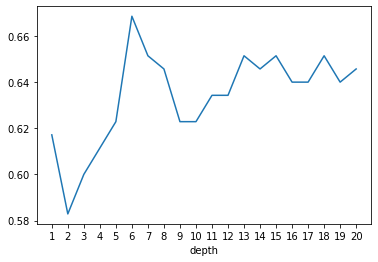

In [7]:
results = []
for depth in range(1, 21):
    clf = DecisionTreeClassifier(max_depth=depth)
    result = {'depth': depth}
    result['score'] = cross_val_score(clf, X_train, y_train, cv=5).mean()
    results.append(result)
        
pd.DataFrame(results).set_index('depth').score.plot(xticks=range(1, 21))

## Grid Search

In [8]:
clf = KNeighborsClassifier()
# keys whose names are the names of hyperparameters
# values are the range of values to search through
params = {'n_neighbors': range(1, 21)}
grid = GridSearchCV(clf, params, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 21)})

In [9]:
grid.cv_results_['mean_test_score']

array([0.59428571, 0.62857143, 0.60571429, 0.62857143, 0.61142857,
       0.61142857, 0.57142857, 0.62285714, 0.6       , 0.64      ,
       0.62285714, 0.65142857, 0.62857143, 0.62285714, 0.64      ,
       0.64      , 0.65142857, 0.63428571, 0.61714286, 0.64      ])

In [10]:
grid.cv_results_['params']

[{'n_neighbors': 1},
 {'n_neighbors': 2},
 {'n_neighbors': 3},
 {'n_neighbors': 4},
 {'n_neighbors': 5},
 {'n_neighbors': 6},
 {'n_neighbors': 7},
 {'n_neighbors': 8},
 {'n_neighbors': 9},
 {'n_neighbors': 10},
 {'n_neighbors': 11},
 {'n_neighbors': 12},
 {'n_neighbors': 13},
 {'n_neighbors': 14},
 {'n_neighbors': 15},
 {'n_neighbors': 16},
 {'n_neighbors': 17},
 {'n_neighbors': 18},
 {'n_neighbors': 19},
 {'n_neighbors': 20}]

In [11]:
grid.best_score_, grid.best_params_

(0.6514285714285715, {'n_neighbors': 12})

In [13]:
knn_model = grid.best_estimator_

In [17]:
clf = DecisionTreeClassifier()
params = {
    'max_depth': range(1, 21),
    'min_samples_leaf': range(1, 11),
    'criterion': ['gini', 'entropy']
}
grid = GridSearchCV(clf, params, cv=10)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 21),
                         'min_samples_leaf': range(1, 11)})

In [23]:
for params, score in zip(grid.cv_results_['params'], grid.cv_results_['mean_test_score']):
    params['score'] = score

pd.DataFrame(grid.cv_results_['params']).sort_values(by='score')

,criterion,max_depth,min_samples_leaf,score
225,entropy,3,6,0.559477
17,gini,2,8,0.565033
18,gini,2,9,0.565033
23,gini,3,4,0.565359
24,gini,3,5,0.565359
...,...,...,...,...
140,gini,15,1,0.713072
130,gini,14,1,0.718627
180,gini,19,1,0.718954
160,gini,17,1,0.718954


## Custom Scoring

In [22]:
from sklearn.metrics import make_scorer, precision_score

clf = KNeighborsClassifier(n_neighbors=5)
cross_val_score(
    clf,
    X_train,
    y_train,
    scoring=make_scorer(precision_score, pos_label='manual'),
    cv=10
)

array([0.5       , 0.33333333, 1.        , 0.75      , 0.25      ,
       0.8       , 0.5       , 0.4       , 0.5       , 0.5       ])

You can use the same `scoring` keyword argument with `GridSearchCV`